In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""Display some predictions."""
import os
from pathlib import Path
import numpy as np
from tensorflow.keras.models import load_model
# import matplotlib.pyplot as plt
from nmp import dataset
# from tensorflow.keras.layers import LSTM
import tensorflow as tf
import copy
import pandas as pd
from nmp.dataset import pyplot_piano_roll, write_midi
from nmp import model as mod
import matplotlib.pyplot as plt
import time
import pypianoroll
import random

P = Path(os.path.abspath(''))  # Compatible with Jupyter Notebook

PLOTS = P / 'plots'  # Plots path
BS = 64
FS = 24  # Sampling frequency. 10 Hz = 100 ms
Q = 0  # Quantize?
st = 10  # Past timesteps
num_ts = 10  # Predicted timesteps
DOWN = 12  # Downsampling factor
# D = "data/Nottingham/test"  # Dataset (synth or data)
# D = "data/Piano-midi.de/test"  # Dataset (synth or data)
# D = "data/JSB Chorales/test"  # Dataset (synth or data)
D = "data/POP909" # Dataset

# MODEL = 'simpleRNN-nottingham-3.h5'
# MODEL_FF = 'ff-z-nottingham'
MODEL = 'lstm-20'
# model_type = 'rnn'

LOW_LIM = 33  # A1
HIGH_LIM = 97  # C7

# LOW_LIM = 36  # A1
# HIGH_LIM = 85  # C7

NUM_NOTES = HIGH_LIM - LOW_LIM
CROP = [LOW_LIM, HIGH_LIM]  # Crop plots

# TensorFlow stuff
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


Using TensorFlow backend.


In [ ]:

# Load model.
# model = load_model(filepath=str(P / 'models' / MODEL),
#                    custom_objects=None, compile=True)
# model.summary()

In [28]:
from tensorflow.keras.callbacks import TensorBoard, CSVLogger
from tensorflow.keras.models import load_model
import keras.metrics

LOAD = 0
if LOAD:
    model = load_model(filepath=model_path,
                       custom_objects=None,
                       compile=True)

else:
    model = mod.build_lstm_model(NUM_NOTES, BS)
    mod.compile_model(model, 'binary_crossentropy', 'adam',
                      metrics=['accuracy', mod.f1, keras.metrics.Precision(), keras.metrics.Recall()])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (64, None, 128)           393728    
_________________________________________________________________
dense_1 (Dense)              (64, None, 64)            8256      
_________________________________________________________________
Output (Dense)               (64, None, 640)           41600     
Total params: 443,584
Trainable params: 443,584
Non-trainable params: 0
_________________________________________________________________


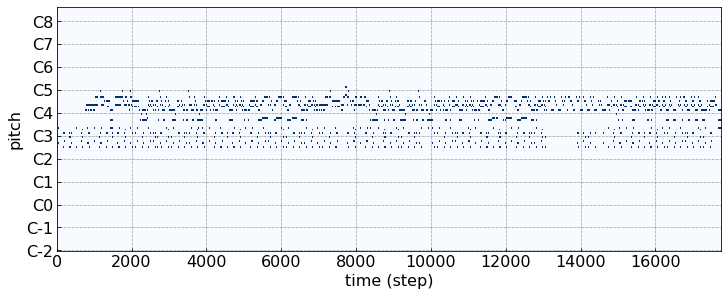

In [36]:

BASE = 0
hm = 4

# FILE = D + '/' + 'ashover_simple_chords_5.mid'
# FILE = 'midi_tests/pattern4BIS.mid'
# FILE = 'midi_tests/bach-minuetto3.mid'
# FILE = D + '/' + 'ashover_simple_chords_5.mid'  # Nottingham
# TRACK = 'alb_esp2.mid'

# TRACK = 'test/001.mid'
# FILE = D + '/' + TRACK
FILE = "midi_tests/ShapeOfYou.mid"
test_file = dataset.import_one(str(FILE), 24)

# FILE = 'jigs_simple_chords_17.mid'
# FILE = 'jigs_simple_chords_101.mid'
# FILE = 'playford_simple_chords_5.mid'
# FILE = 'jigs_simple_chords_227.mid'


test_file = test_file[:, LOW_LIM:HIGH_LIM]
pyplot_piano_roll(test_file, low_lim=+LOW_LIM, high_lim=HIGH_LIM)
STOP = 960


In [37]:

print(test_file.shape)

model.reset_states()
m = 12
random.seed(3)
before = copy.deepcopy(test_file)
# ff_file = copy.deepcopy(test_file)
# base_file = copy.deepcopy(test_file)

err_pos = range(2, int(test_file.shape[0]/(24*m)))
err_pos = [x*24*m + 12 for x in err_pos]
print(err_pos)

errors = []
size = 2
for error in err_pos:
    occurs = random.choice([1])
    if occurs:
        errors.append(error)
        print("Error at timestep n. %d" % error)
        try:
#             ff_file = dataset.fill_gap(ff_file, model_ff, error, size=size, baseline=BASE, how_many=hm)
            test_file = dataset.fill_gap_rnn_final(test_file, model, error, size=size, baseline=BASE, how_many=hm)
#             base_file = dataset.fill_gap_hold(base_file, error, size=size)
            # test_file = dataset.fill_gap(test_file, model, error, size=size, baseline=BASE, how_many=hm)

        except Exception as e:
            print(e)

print("test_file shape: ", test_file.shape)
print("errors: ", errors)
print(len(error))


(17760, 64)
[588, 876, 1164, 1452, 1740, 2028, 2316, 2604, 2892, 3180, 3468, 3756, 4044, 4332, 4620, 4908, 5196, 5484, 5772, 6060, 6348, 6636, 6924, 7212, 7500, 7788, 8076, 8364, 8652, 8940, 9228, 9516, 9804, 10092, 10380, 10668, 10956, 11244, 11532, 11820, 12108, 12396, 12684, 12972, 13260, 13548, 13836, 14124, 14412, 14700, 14988, 15276, 15564, 15852, 16140, 16428, 16716, 17004, 17292]
Error at timestep n. 588
Invalid input_h shape: [1,64,128] [1,1,128] [Op:CudnnRNN]
Error at timestep n. 876
Invalid input_h shape: [1,64,128] [1,1,128] [Op:CudnnRNN]
Error at timestep n. 1164
Invalid input_h shape: [1,64,128] [1,1,128] [Op:CudnnRNN]
Error at timestep n. 1452
Invalid input_h shape: [1,64,128] [1,1,128] [Op:CudnnRNN]
Error at timestep n. 1740
Invalid input_h shape: [1,64,128] [1,1,128] [Op:CudnnRNN]
Error at timestep n. 2028
Invalid input_h shape: [1,64,128] [1,1,128] [Op:CudnnRNN]
Error at timestep n. 2316
Invalid input_h shape: [1,64,128] [1,1,128] [Op:CudnnRNN]
Error at timestep n. 26

In [38]:
if errors[-1] > test_file.shape[0]:
    errors.pop()

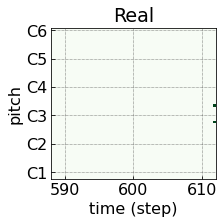

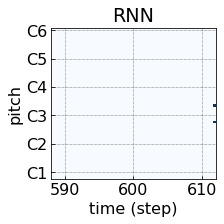

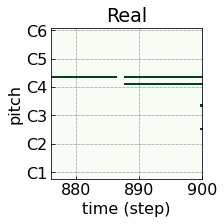

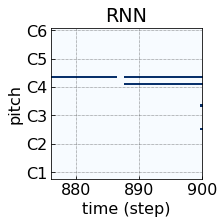

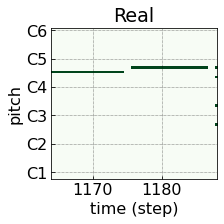

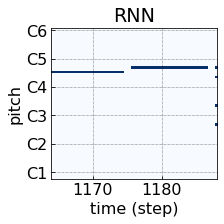

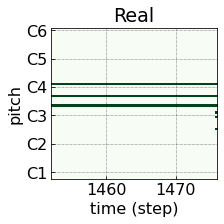

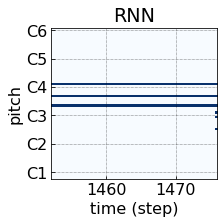

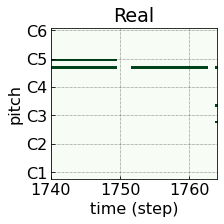

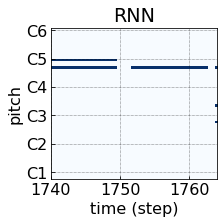

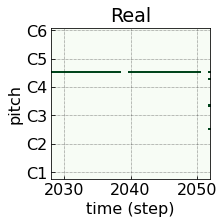

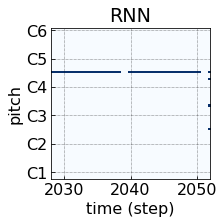

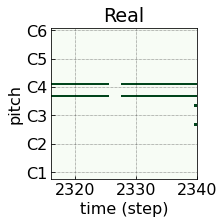

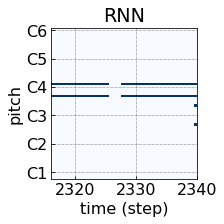

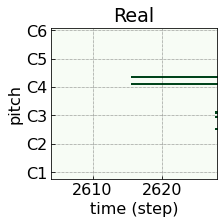

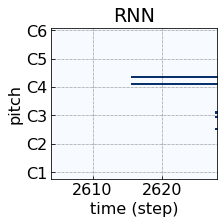

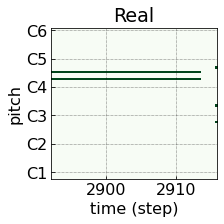

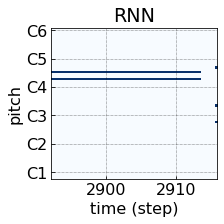

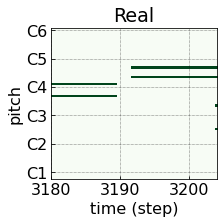

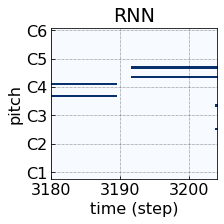

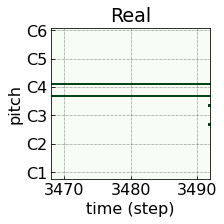

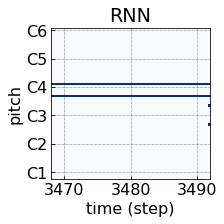

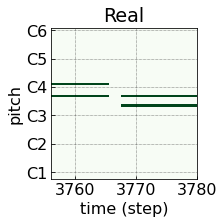

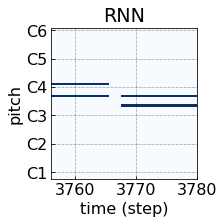

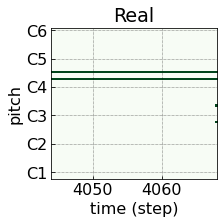

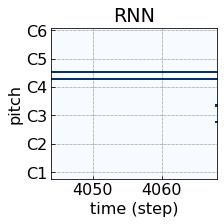

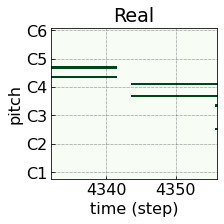

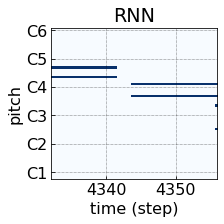

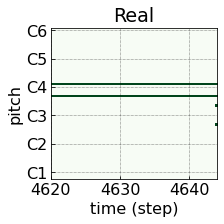

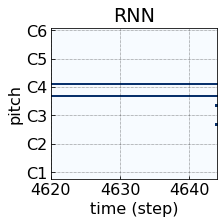

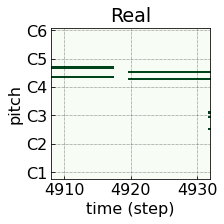

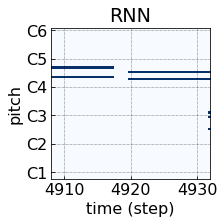

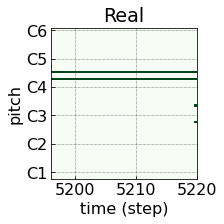

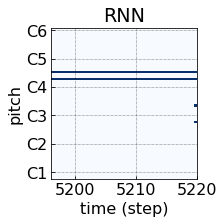

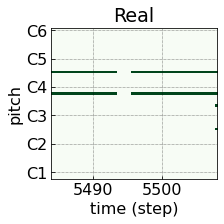

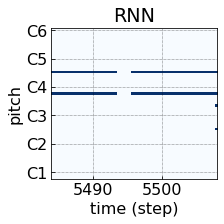

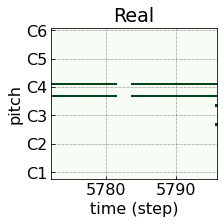

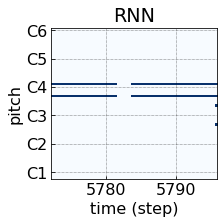

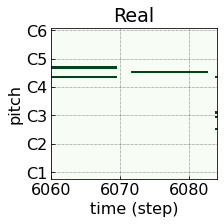

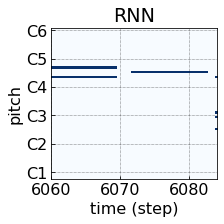

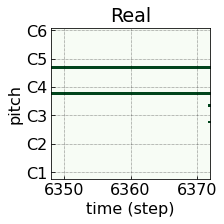

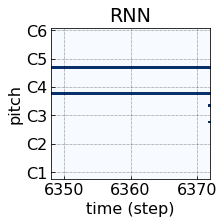

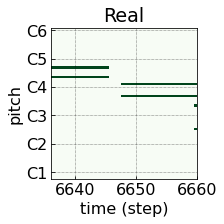

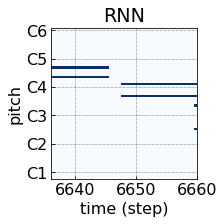

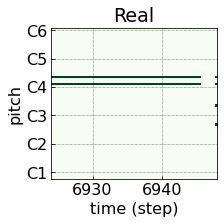

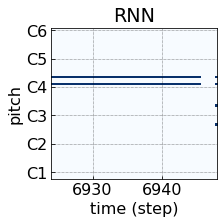

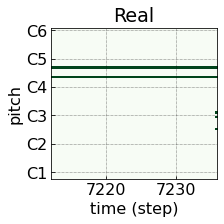

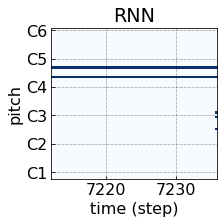

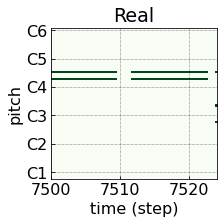

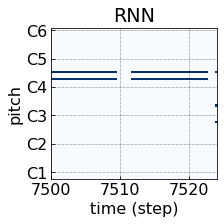

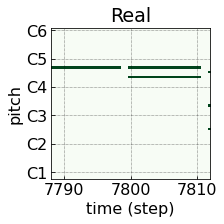

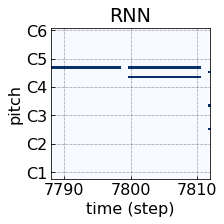

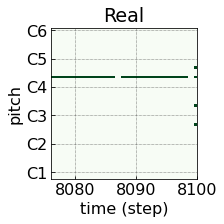

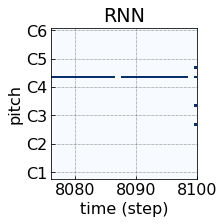

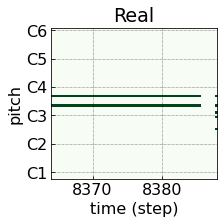

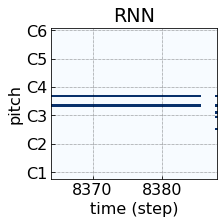

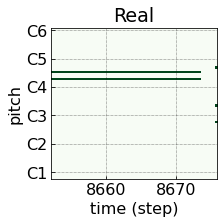

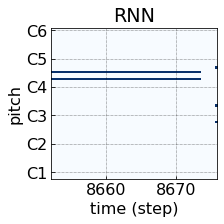

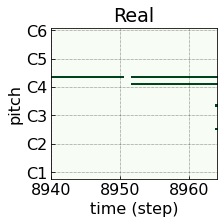

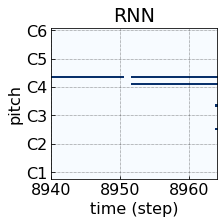

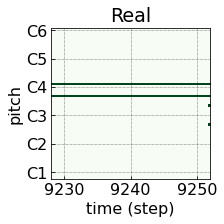

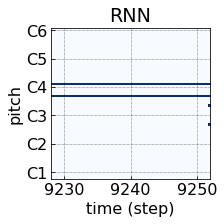

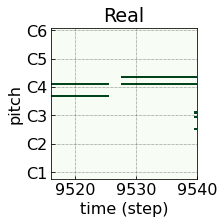

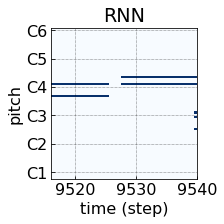

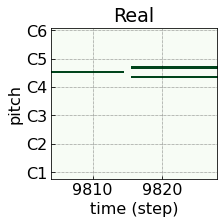

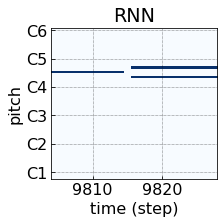

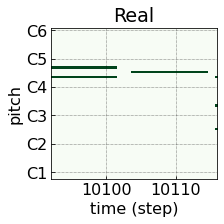

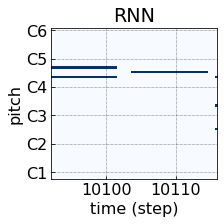

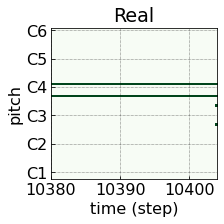

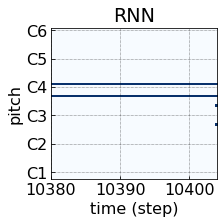

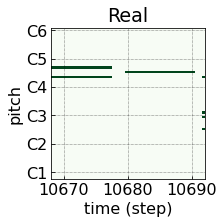

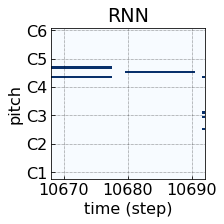

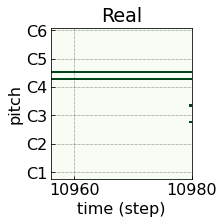

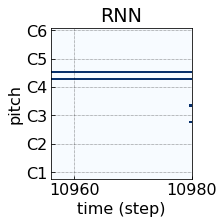

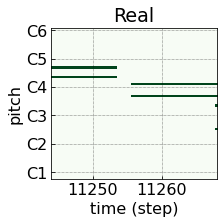

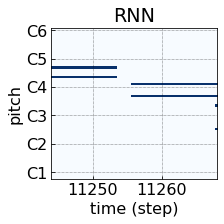

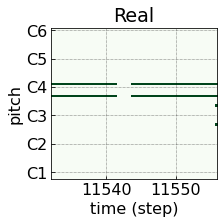

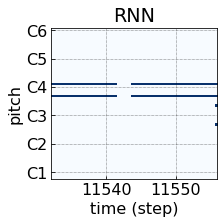

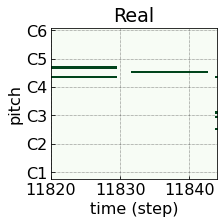

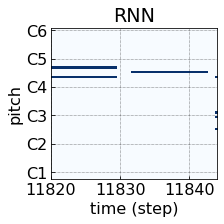

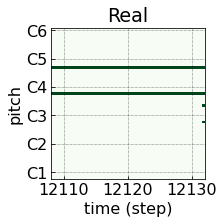

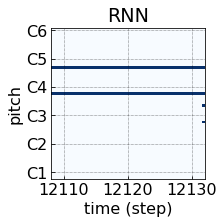

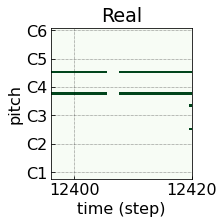

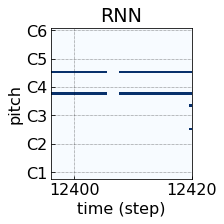

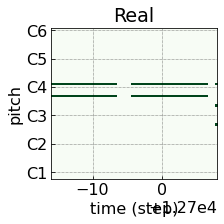

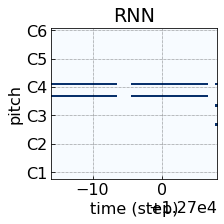

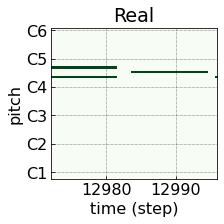

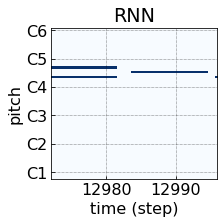

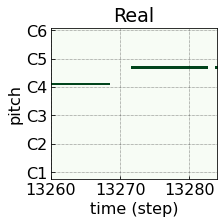

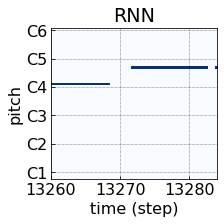

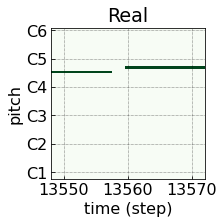

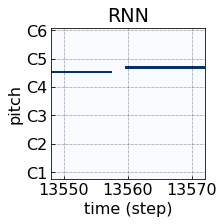

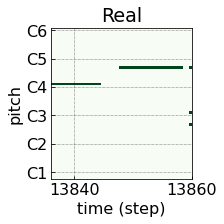

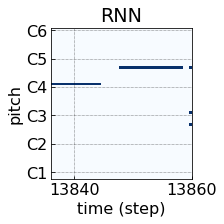

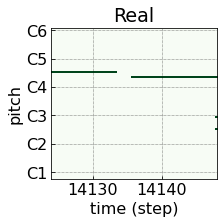

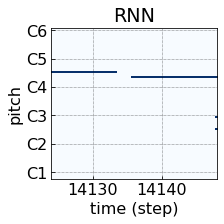

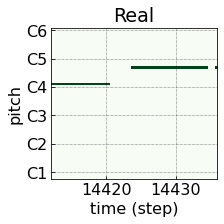

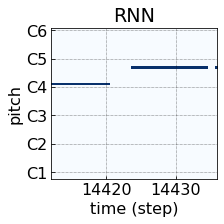

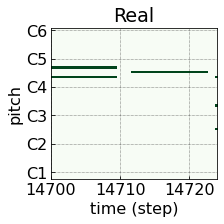

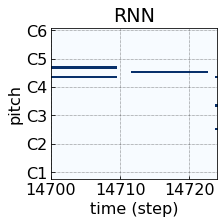

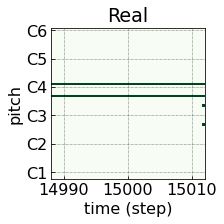

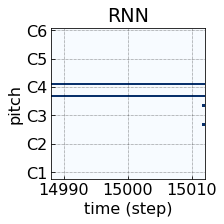

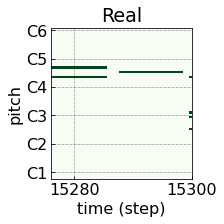

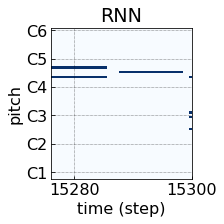

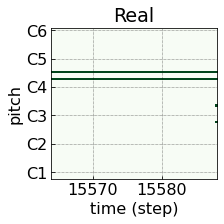

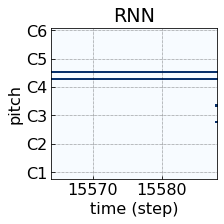

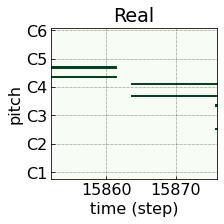

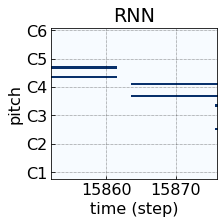

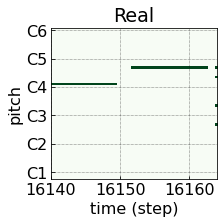

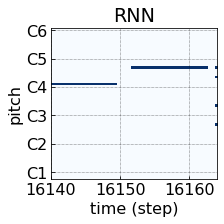

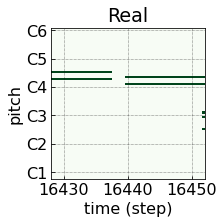

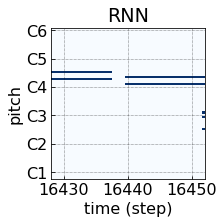

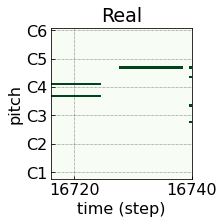

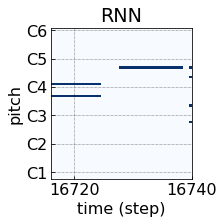

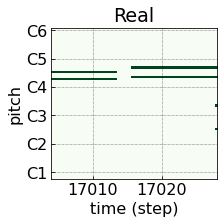

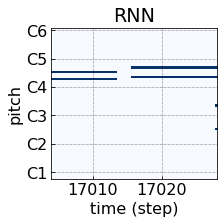

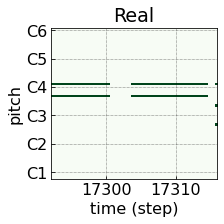

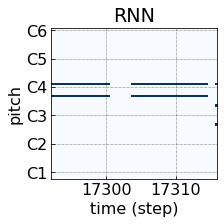

In [39]:
plt.rcParams["figure.figsize"] = (3, 3)
plt.rc('text', usetex=False)
for e in errors:
    x1 = e
    x2 = e + size*12
    xcrop = [e, e + size*12]
    pyplot_piano_roll(before, low_lim=+LOW_LIM, high_lim=HIGH_LIM, cmap='Greens')
    plt.ylim([33, 97])
    plt.xlim(xcrop)
    plt.title("Real")
#     pyplot_piano_roll(ff_file, low_lim=+LOW_LIM, high_lim=HIGH_LIM, cmap='Reds')
#     plt.ylim([33, 97])
#     plt.xlim(xcrop)
#     plt.title("Feed forward")
    pyplot_piano_roll(test_file, low_lim=+LOW_LIM, high_lim=HIGH_LIM, cmap='Blues')
    plt.ylim([33, 97])
    plt.xlim(xcrop)
    plt.title("RNN")
#     pyplot_piano_roll(base_file, low_lim=+LOW_LIM, high_lim=HIGH_LIM, cmap='Blues')
#     plt.ylim([33, 97])
#     plt.xlim(xcrop)
#     plt.title("Hold baseline")
    continue


In [41]:

db = []
db += [e for e in errors]
db += [e+size*12 for e in errors]
db.sort()
print(db)


[588, 612, 876, 900, 1164, 1188, 1452, 1476, 1740, 1764, 2028, 2052, 2316, 2340, 2604, 2628, 2892, 2916, 3180, 3204, 3468, 3492, 3756, 3780, 4044, 4068, 4332, 4356, 4620, 4644, 4908, 4932, 5196, 5220, 5484, 5508, 5772, 5796, 6060, 6084, 6348, 6372, 6636, 6660, 6924, 6948, 7212, 7236, 7500, 7524, 7788, 7812, 8076, 8100, 8364, 8388, 8652, 8676, 8940, 8964, 9228, 9252, 9516, 9540, 9804, 9828, 10092, 10116, 10380, 10404, 10668, 10692, 10956, 10980, 11244, 11268, 11532, 11556, 11820, 11844, 12108, 12132, 12396, 12420, 12684, 12708, 12972, 12996, 13260, 13284, 13548, 13572, 13836, 13860, 14124, 14148, 14412, 14436, 14700, 14724, 14988, 15012, 15276, 15300, 15564, 15588, 15852, 15876, 16140, 16164, 16428, 16452, 16716, 16740, 17004, 17028, 17292, 17316]


findfont: Font family ['custom'] not found. Falling back to DejaVu Sans.


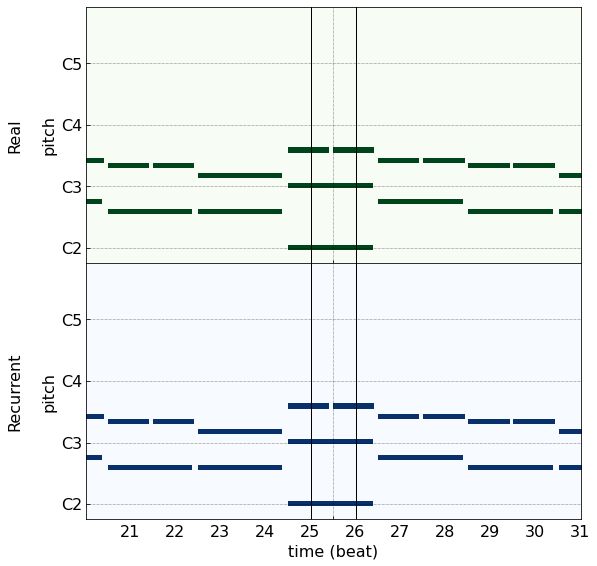

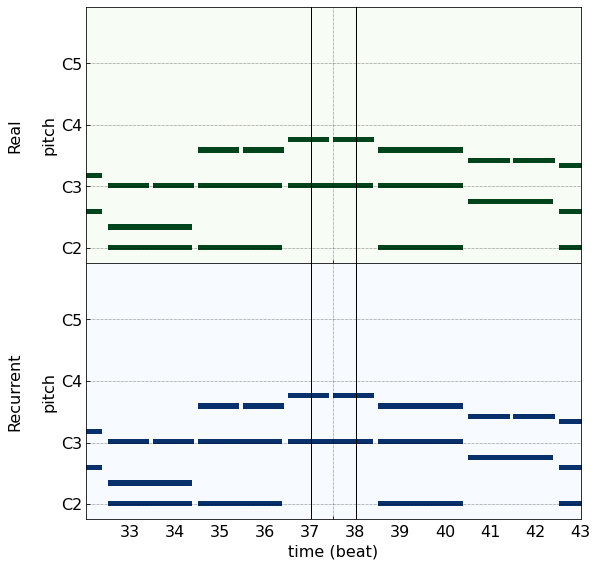

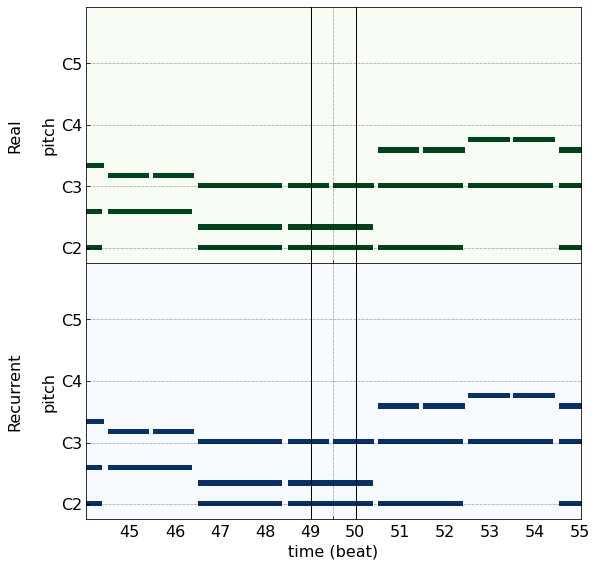

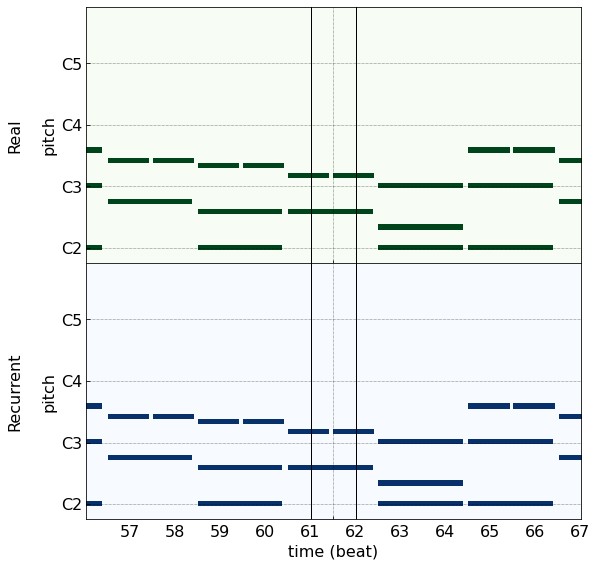

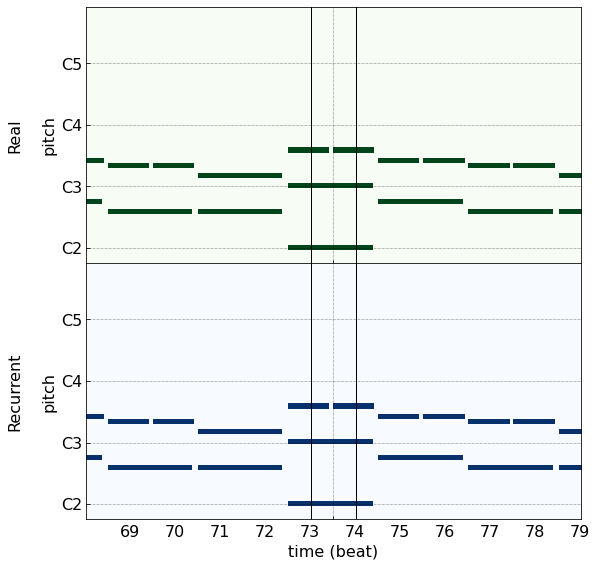

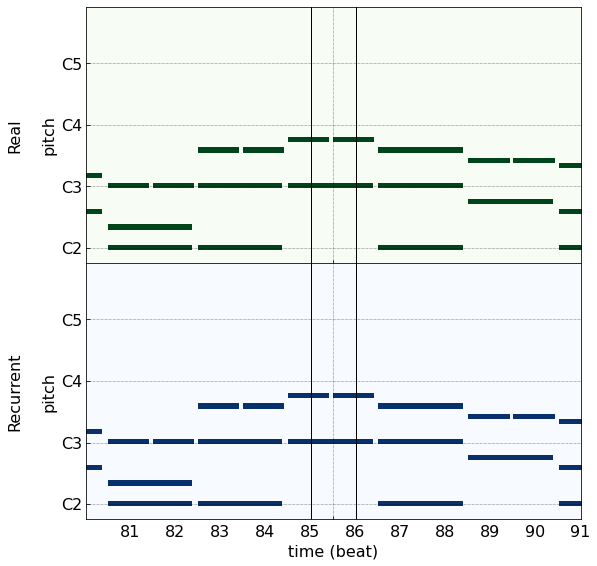

In [22]:

plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.constrained_layout.use"] = True
# plt.rcParams["figure.constrained_layout.use"] = False

import matplotlib
from matplotlib import rc
matplotlib.rcParams['mathtext.rm'] = 'custom'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['font.family'] = 'custom'

# rc('text', usetex=True)
rc('text', usetex=False)
rc('text.latex', preamble=r'\usepackage{classicthesis}')
plt.rcParams.update({'font.size': 16})

tr1 = pypianoroll.Track(dataset.pad_piano_roll(before, low_lim=LOW_LIM, high_lim=HIGH_LIM), name='Real')
# tr2 = pypianoroll.Track(dataset.pad_piano_roll(ff_file, low_lim=LOW_LIM, high_lim=HIGH_LIM), name='Feedforward')
tr3 = pypianoroll.Track(dataset.pad_piano_roll(test_file, low_lim=LOW_LIM, high_lim=HIGH_LIM), name='Recurrent')
# tr4 = pypianoroll.Track(dataset.pad_piano_roll(base_file, low_lim=LOW_LIM, high_lim=HIGH_LIM), name='Baseline')

# multitrack = pypianoroll.Multitrack(tracks=[tr1, tr2, tr3, tr4], downbeat=db)
multitrack = pypianoroll.Multitrack(tracks=[tr1, tr3], downbeat=db)
for cnt, e in enumerate(errors):
    x1 = e
    x2 = e + size*12
    xcrop = [e-120, e + size*12 + 120]
    fig, axs = multitrack.plot(xtick='auto', cmaps=['Greens', 'Blues', 'Reds', 'Purples'])
    for ax in axs:
        ax.set_xlim(xcrop)
        ax.set_ylim([45, 95])
#         ax.set_ylim([50, 75])
        ax.set_xticks([e + 12*i for i in range(size+1)])
    plt.gcf().subplots_adjust(left=0.12)
    plt.gcf().subplots_adjust(right=0.98)
    plt.gcf().subplots_adjust(top=0.99)
    plt.gcf().subplots_adjust(bottom=0.1)
#     plt.tight_layout()
#     plt.savefig(PLOTS / 'gaps' / (TRACK + '_gap_' + str(cnt) + '.png'), dpi=300)
#     print("Figure saved: " + str(PLOTS / (TRACK + 'gaps') / ('gap_' + str(cnt) + '.png')))
#     break


(33.0, 97.0)

findfont: Font family ['custom'] not found. Falling back to DejaVu Sans.


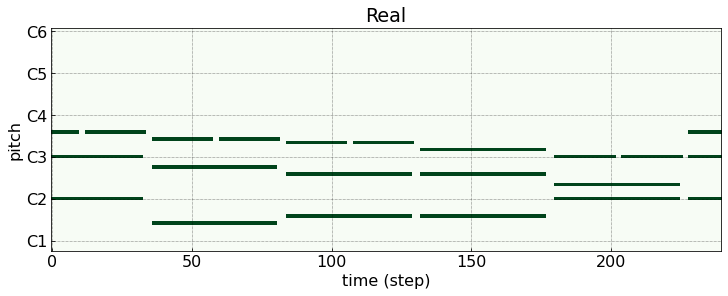

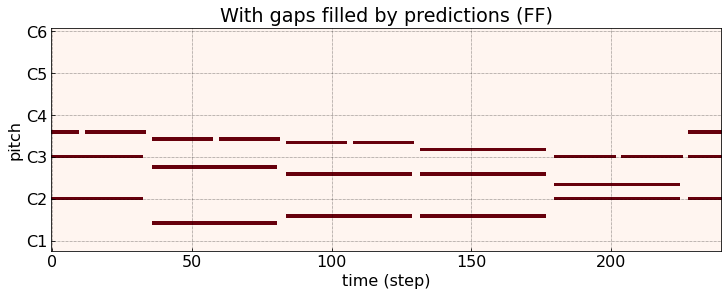

In [23]:

# assert False
plt.rcParams["figure.figsize"] = (10, 4)
plt.rc('text', usetex=False)
x1 = errors[0]
x2 = errors[0] + 240
pyplot_piano_roll(before[x1:x2], low_lim=+LOW_LIM, high_lim=HIGH_LIM, cmap='Greens')
plt.title("Real")
plt.ylim([33, 97])

pyplot_piano_roll(test_file[x1:x2], low_lim=+LOW_LIM, high_lim=HIGH_LIM, cmap='Reds')
plt.title("With gaps filled by predictions (FF)")
plt.ylim([33, 97])
# plt.savefig(PLOTS / (FILE + '-ff.png'))


[588, 876, 1164, 1452, 1740, 2028, 2316, 2604, 2892, 3180, 3468, 3756, 4044, 4332, 4620, 4908, 5196, 5484, 5772, 6060, 6348, 6636, 6924, 7212, 7500, 7788, 8076, 8364, 8652, 8940, 9228, 9516, 9804, 10092, 10380, 10668, 10956, 11244, 11532, 11820, 12108, 12396, 12684, 12972, 13260, 13548, 13836, 14124, 14412, 14700, 14988, 15276, 15564, 15852, 16140, 16428, 16716, 17004, 17292]
[588, 708, 876, 996, 1164, 1284, 1452, 1572, 1740, 1860, 2028, 2148, 2316, 2436, 2604, 2724, 2892, 3012, 3180, 3300, 3468, 3588, 3756, 3876, 4044, 4164, 4332, 4452, 4620, 4740, 4908, 5028, 5196, 5316, 5484, 5604, 5772, 5892, 6060, 6180, 6348, 6468, 6636, 6756, 6924, 7044, 7212, 7332, 7500, 7620, 7788, 7908, 8076, 8196, 8364, 8484, 8652, 8772, 8940, 9060, 9228, 9348, 9516, 9636, 9804, 9924, 10092, 10212, 10380, 10500, 10668, 10788, 10956, 11076, 11244, 11364, 11532, 11652, 11820, 11940, 12108, 12228, 12396, 12516, 12684, 12804, 12972, 13092, 13260, 13380, 13548, 13668, 13836, 13956, 14124, 14244, 14412, 14532, 1470

(33.0, 97.0)

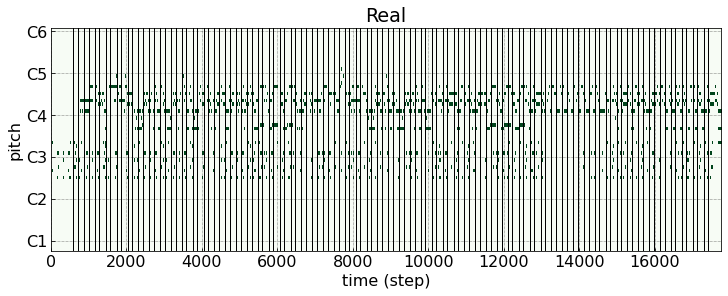

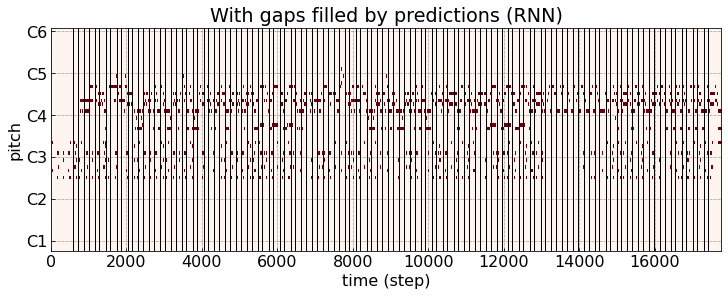

In [42]:
plt.rcParams["figure.figsize"] = (10, 4)
dbs=[y+x for y in errors for x in [0, 120]]
print(errors)
print(dbs)
pyplot_piano_roll(before, low_lim=+LOW_LIM, high_lim=HIGH_LIM, db=dbs, cmap='Greens')
plt.title("Real")
plt.ylim([33, 97])
# plt.savefig(PLOTS / (FILE + '-real.png'))

pyplot_piano_roll(test_file, low_lim=+LOW_LIM, high_lim=HIGH_LIM, db=dbs, cmap='Reds')
plt.title("With gaps filled by predictions (RNN)")
plt.ylim([33, 97])
# plt.savefig(PLOTS / (FILE + '-rnn.png'))

# pyplot_piano_roll(ff_file, low_lim=+LOW_LIM, high_lim=HIGH_LIM, db=dbs, cmap='Blues')
# plt.title("With gaps filled by predictions (FF)")
# plt.ylim([33, 97])
# plt.savefig(PLOTS / (FILE + '-ff.png'))

# pyplot_piano_roll(base_file, low_lim=+LOW_LIM, high_lim=HIGH_LIM, db=dbs, cmap='Purples')
# plt.title("With gaps filled by predictions (Holding baseline)")
# plt.ylim([33, 97])
# plt.savefig(PLOTS / (FILE + '-ff.png'))


midi_tests/ShapeOfYou.mid


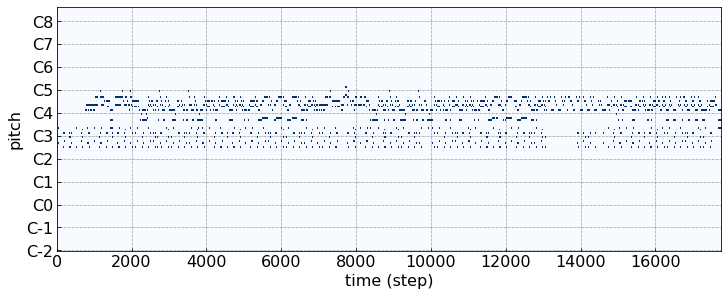

In [43]:
pyplot_piano_roll(test_file, low_lim=+LOW_LIM, high_lim=HIGH_LIM)

tempo = 100
# tempo = 120

# f0 = copy.deepcopy(test_file)
# dataset.write_midi(f0, str(P / 'audio_output' / (FILE + '_filled_rnn.mid')),
#                    LOW_LIM, HIGH_LIM, tempo=tempo, br=24)

# f1 = copy.deepcopy(ff_file)
# dataset.write_midi(f1, str(P / 'audio_output' / (FILE + '_filled_ff.mid')),
#                    LOW_LIM, HIGH_LIM, tempo=tempo, br=24)

# f3 = copy.deepcopy(base_file)
# dataset.write_midi(f3, str(P / 'audio_output' / (FILE + '_filled_base.mid')),
#                    LOW_LIM, HIGH_LIM, tempo=tempo, br=24)

f0 = copy.deepcopy(test_file)
dataset.write_midi(f0, ('audio_output/ShapeofYou_rnn.mid'),
                   LOW_LIM, HIGH_LIM, tempo=tempo, br=24)
print(FILE)

# f1 = copy.deepcopy(ff_file)
# dataset.write_midi(f1, (FILE + '_filled_ff.mid'),
#                    LOW_LIM, HIGH_LIM, tempo=tempo, br=24)

# f3 = copy.deepcopy(base_file)
# dataset.write_midi(f3, (FILE + '_filled_base.mid'),
#                    LOW_LIM, HIGH_LIM, tempo=tempo, br=24)


In [ ]:

# end = STOP + 120

# past = dataset.downsample_roll(test_file[STOP:end, :], 10, 12)
# past = np.array([past])

# predictions = model.predict(past)
# predictions_bin = dataset.ranked_threshold(predictions, steps=10, how_many=5)
# predictions_bin = predictions_bin.reshape((10, 64))
# pyplot_piano_roll(predictions_bin, low_lim=+LOW_LIM, high_lim=HIGH_LIM)

# upsampled = copy.deepcopy(predictions_bin)
# upsampled = dataset.upsample_roll(upsampled, 10, 12)
# # pyplot_piano_roll(arr, low_lim=+LOW_LIM, high_lim=HIGH_LIM)

# final = copy.deepcopy(test_file)
# final[end: end+12*5] = upsampled[:12*5]

# dataset.write_midi(final, ('audio_output/simple_ff004.mid'),
#                    LOW_LIM, HIGH_LIM, tempo=tempo, br=24)
